# Logistic Regression with Python

## Objectives

After completing this lab you will be able to:

* Use Logistic Regression for classification
* Preprocess data for modeling
* Implement Logistic regression on real world data


## Install and import the required libraries
Make sure the required libraries are available by executing the cell below.


In [21]:
# !pip install numpy==2.2.0
# !pip install pandas==2.2.3
# !pip install scikit-learn==1.6.0
# !pip install matplotlib==3.9.3

Let's first import required libraries:


In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Classification with Logistic Regression

### Scenario
Assume that you are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.


### About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 
<br><br>
This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.


### Coefficient Remark
Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.  


### Load Data from CSV


In [27]:
churn_df = pd.read_csv('ChurnData.csv')

In [28]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   tenure      200 non-null    float64
 2   age         200 non-null    float64
 3   address     200 non-null    float64
 4   income      200 non-null    float64
 5   ed          200 non-null    float64
 6   employ      200 non-null    float64
 7   equip       200 non-null    float64
 8   callcard    200 non-null    float64
 9   wireless    200 non-null    float64
 10  longmon     200 non-null    float64
 11  tollmon     200 non-null    float64
 12  equipmon    200 non-null    float64
 13  cardmon     200 non-null    float64
 14  wiremon     200 non-null    float64
 15  longten     200 non-null    float64
 16  tollten     200 non-null    float64
 17  cardten     200 non-null    float64
 18  voice       200 non-null    float64
 19  pager       200 non-null    f

There are 28 Columns, All are Float64. There is no Null value for all the columns.  Churn is to predict and hence need to be integer data type. For Practice Lets select half of the features

Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the scikit-learn algorithm:


## Data Preprocessing


we can use a subset of the fields available to develop out model. Let us assume that the fields we use are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.

In [29]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [30]:
# CHECKING DATA TYPE OF Subset of Attributes. 
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   200 non-null    float64
 1   age      200 non-null    float64
 2   address  200 non-null    float64
 3   income   200 non-null    float64
 4   ed       200 non-null    float64
 5   employ   200 non-null    float64
 6   equip    200 non-null    float64
 7   churn    200 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


For modeling the input fields X and the target field y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining fields as the input. Store these values in the variable 'X'.


## Practice Exercises
Try to attempt the following questions yourself based on what you learnt in this lab.

<br>

a. Let us assume we add the feature 'callcard' to the original set of input features. What will the value of log loss be in this case?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.6039104035600186.
</details>

b. Let us assume we add the feature 'wireless' to the original set of input features. What will the value of log loss be in this case?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.7227054293985518.
</details>

c. What happens to the log loss value if we add both "callcard" and "wireless" to the input features?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.7760557225417114
</details>

d. What happens to the log loss if we remove the feature 'equip' from the original set of input features?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df Make sure to edit the list of features feeding the variable X. The expected answer is 0.5302427350245369
</details>

e. What happens to the log loss if we remove the features 'income' and 'employ' from the original set of input features?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.6529317169884828.
</details>


### Practice Exercises

In [31]:
def get_log_loss_with_params(param_list):
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
    churn_df_orginal = pd.read_csv(url)

    # Subset Requried for the Logistic Regression
    churn_df_a = churn_df_orginal[param_list]
    churn_df_a['churn'] = churn_df['churn'].astype('int')
    churn_df_a
    
    # Step 1 | Convert to Numpy array
    X_np_a = churn_df_a.iloc[:, :-1].to_numpy() # getting all columns except the churn column, which is the last column and convert into numpy array
    y_np_a = churn_df_a[['churn']].to_numpy() # get only churn column and convert into numpy array
    
    # print(X_np_a[0:5])
    # print(y_np_a[0:5])
    
    # Step 2 | Normalize the Independent variable. ( Standard Scaler )
    X_norm_np_a = StandardScaler().fit_transform(X_np_a)
    # print(X_norm_np_a[0:5])
    
    
    # Step 3 | Train and Test Split the Normalized Data
    X_train, X_test, y_train, y_test  = train_test_split(X_norm_np_a, y_np_a, test_size=0.20, random_state=4)
    
    # Step 4 | Train and Fit the Model
    LR_a = LogisticRegression()
    LR_a.fit(X_train, y_train)
    
    # Step 5 | get the Predicted Array
    y_hat = LR_a.predict(X_test)
    
    # Step 6 | Show me the probability of each class for given input feature.
    y_hat_prob = LR_a.predict_proba(X_test)
    # print("Y_hat probability : ", y_hat_prob[0:10])
    
    # Step 7 | Use the Cofficient to see the impact.
    LR_a_coefficient = LR_a.coef_[0]
    # print("LR Cofficient : ", LR_a_coefficient[0:10])
    pd.Series(LR_a_coefficient,index=churn_df_a.columns[0:-1]).plot(kind='barh',figsize=(5,2))
    plt.title("Feature Coefficients in Logistic Regression Churn Model")
    plt.xlabel("Coefficient Value")
    plt.show()
    
    # Step 8 | get Log_loss_function
    log_loss_a = log_loss(y_test, y_hat_prob)
    print('Log Loss Probability : ', log_loss_a)
    

### Problem a. Let us assume we add the feature 'callcard' to the original set of input features. What will the value of log loss be in this case?

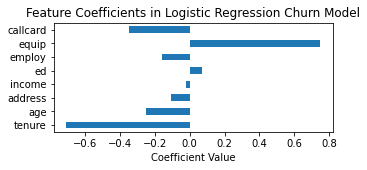

Log Loss Probability :  0.6039104035600186


In [39]:
param_list_1 = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard' , 'churn']
get_log_loss_with_params(param_list_1)

### Problem b. Let us assume we add the feature 'wireless' to the original set of input features. What will the value of log loss be in this case?

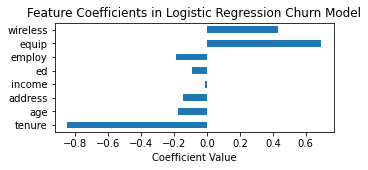

Log Loss Probability :  0.7227054293985515


In [40]:
param_list_1 = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless' , 'churn']
get_log_loss_with_params(param_list_1)

### Problem c. What happens to the log loss value if we add both "callcard" and "wireless" to the input features?

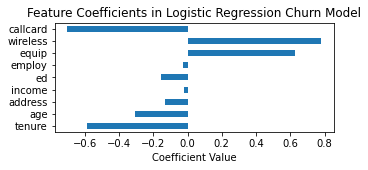

Log Loss Probability :  0.7760557225417115


In [41]:
param_list_1 = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless','callcard', 'churn']
get_log_loss_with_params(param_list_1)

### Problem d. What happens to the log loss if we remove the feature 'equip' from the original set of input features?

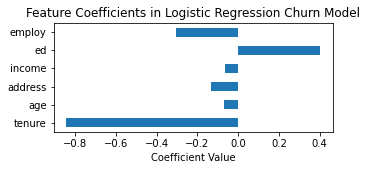

Log Loss Probability :  0.530242735024537


In [44]:
param_list_1 = ['tenure', 'age', 'address', 'income', 'ed', 'employ',  'churn']
get_log_loss_with_params(param_list_1)

### Problem e. What happens to the log loss if we remove the features 'income' and 'employ' from the original set of input features?

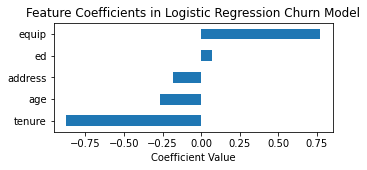

Log Loss Probability :  0.6529317169884828


In [45]:
param_list_1 = ['tenure', 'age', 'address',  'ed', 'equip',  'churn']
get_log_loss_with_params(param_list_1)

## Author
 
Arpan Saini
 
 